In [55]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [56]:
#Charges données
df_olist_customers = pd.read_csv('../../data/olist_customers_dataset.csv')
df_olist_geolocation = pd.read_csv('../../data/olist_geolocation_dataset.csv')
df_olist_order_items = pd.read_csv('../../data/olist_order_items_dataset.csv')
df_olist_order_payments = pd.read_csv('../../data/olist_order_payments_dataset.csv')
df_olist_order_review = pd.read_csv('../../data/olist_order_reviews_dataset.csv')
df_olist_orders = pd.read_csv('../../data/olist_orders_dataset.csv')
df_olist_products = pd.read_csv('../../data/olist_products_dataset.csv')
df_olist_sellers = pd.read_csv('../../data/olist_sellers_dataset.csv')
df_prodct_category = pd.read_csv('../../data/product_category_name_translation.csv')

In [57]:
def get_dummies(df, col_name, list_values):
    for value in list_values:
        new_col_name = col_name + "Is_"+ value
        df[new_col_name] =(df[col_name] == value).astype(int)
    del df[col_name]
    return df

In [58]:
sellersAndOrderItems = df_olist_sellers.merge(df_olist_order_items)
sellersAndOrderItemsAndPayments = sellersAndOrderItems.merge(df_olist_order_payments)
sellersAndOrderItemsAndPaymentsAndOrders = sellersAndOrderItemsAndPayments.merge(df_olist_orders)
sellersAndOrderItemsAndPaymentsAndOrders
sellersAndOrderItemsAndPaymentsAndOrders['price_freight_value'] = sellersAndOrderItemsAndPaymentsAndOrders['price'] - sellersAndOrderItemsAndPaymentsAndOrders['freight_value']
sellersAndOrderItemsAndPaymentsAndOrders

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price_freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,2,115.76,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,96.64
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,2,117.62,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,85.78
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,4,158.80,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,8.38
3,8c16d1f32a54d92897cc437244442e1b,89023,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.90,26.68,...,4,158.80,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,92.22
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,1,135.08,9facbfd2dd51a45404d58154b12ed2dd,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,44.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.00,16.05,...,1,43.05,f0426deff141dffab4da4832186f4a36,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-03 14:01:24,2017-03-06 15:34:28,2017-03-28 00:00:00,10.95
117597,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.00,10.96,...,1,37.96,63d8ce2f854381279f3b762e962dc969,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-10 07:07:56,2017-02-13 11:09:12,2017-03-10 00:00:00,16.04
117598,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.00,16.05,...,1,43.05,9a3aaf9447f2fbd34372e69398b2ede3,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-05 09:53:19,2017-04-10 16:37:06,2017-05-03 00:00:00,10.95
117599,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.00,12.48,...,1,39.48,4d3e75dab77ee14de42b66f557ea4d3a,canceled,2017-06-16 17:21:21,2017-06-16 17:30:16,NaN,NaN,2017-07-10 00:00:00,14.52


Text(0.5, 1.0, 'Sales per day')

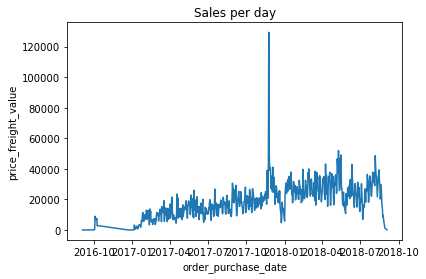

In [59]:
sellersAndOrderItemsAndPaymentsAndOrders.order_purchase_timestamp = pd.to_datetime(sellersAndOrderItemsAndPaymentsAndOrders.order_purchase_timestamp)
sellersAndOrderItemsAndPaymentsAndOrders['order_purchase_date'] = sellersAndOrderItemsAndPaymentsAndOrders.order_purchase_timestamp.dt.date

sales_per_purchase_date = sellersAndOrderItemsAndPaymentsAndOrders.groupby('order_purchase_date', as_index=False).price_freight_value.sum()
ax = sns.lineplot(x="order_purchase_date", y="price_freight_value", data=sales_per_purchase_date)
ax.set_title('Sales per day')

In [60]:
print("Le montant maximum commandé est de :",sellersAndOrderItemsAndPaymentsAndOrders['price'].max())
print("Le montant minimum commandé est de :",sellersAndOrderItemsAndPaymentsAndOrders['price'].min())
print("Le montant moyen commandé est de :",sellersAndOrderItemsAndPaymentsAndOrders['price'].mean())
print("Le montant median commandé est de :",sellersAndOrderItemsAndPaymentsAndOrders['price'].median())
print("==================================================================")

print("Le montant maximum commandé (sans frais de port) est de :",sellersAndOrderItemsAndPaymentsAndOrders['price_freight_value'].max())
print("Le montant minimum commandé (sans frais de port) est de :",sellersAndOrderItemsAndPaymentsAndOrders['price_freight_value'].min())
print("Le montant moyen commandé (sans frais de port) est de :",sellersAndOrderItemsAndPaymentsAndOrders['price_freight_value'].mean())
print("Le montant median commandé (sans frais de port) est de :",sellersAndOrderItemsAndPaymentsAndOrders['price_freight_value'].median())


print("==================================================================")
print("Le frais de port le plus élévé est à : ",sellersAndOrderItemsAndPaymentsAndOrders['freight_value'].max())
print("Le frais de port le plus faible est à :",sellersAndOrderItemsAndPaymentsAndOrders['freight_value'].min())
print("Les frais de port moyens sont à :",sellersAndOrderItemsAndPaymentsAndOrders['freight_value'].mean())
print("Les frais de port médians sont à :",sellersAndOrderItemsAndPaymentsAndOrders['freight_value'].median())

Le montant maximum commandé est de : 6735.0
Le montant minimum commandé est de : 0.85
Le montant moyen commandé est de : 120.82478329265909
Le montant median commandé est de : 74.9
Le montant maximum commandé (sans frais de port) est de : 6540.69
Le montant minimum commandé (sans frais de port) est de : -140.53
Le montant moyen commandé (sans frais de port) est de : 100.77879295244088
Le montant median commandé (sans frais de port) est de : 56.17
Le frais de port le plus élévé est à :  409.68
Le frais de port le plus faible est à : 0.0
Les frais de port moyens sont à : 20.045990340218193
Les frais de port médians sont à : 16.29


In [61]:
df_olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [62]:
df_olist_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [74]:
df_olist_geolocation['seller_zip_code_prefix'] = df_olist_geolocation['geolocation_zip_code_prefix']
df_olist_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix
0,1037,-23.545621,-46.639292,sao paulo,SP,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,1035
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,99950
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,99900
1000160,99950,-28.071855,-52.014716,tapejara,RS,99950
1000161,99980,-28.388932,-51.846871,david canabarro,RS,99980


In [75]:
sellersLocations = df_olist_sellers.merge(df_olist_geolocation)
sellersLocations

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...,...,...,...,...
435082,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.011130,-45.592347,taubate,SP
435083,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.013452,-45.584299,taubaté,SP
435084,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009155,-45.592019,taubate,SP
435085,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009019,-45.584925,taubate,SP
